# Ejercicio de Regresión Logística
Realizaremos un ejercicio de prueba para comprender como funciona este algoritmo

Vamos a clasificar problemas con dos posibles estados “SI/NO”: binario o un número finito de “etiquetas” o “clases”: múltiple. Algunos Ejemplos de Regresión Logística son:


* Clasificar si el correo que llega es Spam o No es Spam
* Dados unos resultados clínicos de un tumor clasificar en “Benigno” o “Maligno”.
* El texto de un artículo a analizar es: Entretenimiento, Deportes, Política ó Ciencia
* A partir de historial bancario conceder un crédito o no

Confiaremos en la implementación del paquete sklearn en Python para ponerlo en práctica.

# Objetivo
__En este notebook intentaremos predecir que sistema operativo utiliza un usuario en función a una serie de caracteristicas de navegación__

## Imports

In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

## Cargamos los datos de entrada del archivo csv

In [2]:
dataframe = pd.read_csv(r"usuarios_win_mac_lin.csv")
dataframe.head()

,duracion,paginas,acciones,valor,clase
0,7.0,2,4,8,2
1,21.0,2,6,6,2
2,57.0,2,4,4,2
3,101.0,3,6,12,2
4,109.0,2,6,12,2


A continuación llamamos al método dataframe.describe() que nos dará algo de información estadística básica de nuestro set de datos. La Media, el desvío estándar, valores mínimo y máximo de cada característica.

In [3]:
dataframe.describe()

,duracion,paginas,acciones,valor,clase
count,170.000000,170.000000,170.000000,170.000000,170.000000
mean,111.075729,2.041176,8.723529,32.676471,0.752941
std,202.453200,1.500911,9.136054,44.751993,0.841327
min,1.000000,1.000000,1.000000,1.000000,0.000000
25%,11.000000,1.000000,3.000000,8.000000,0.000000
50%,13.000000,2.000000,6.000000,20.000000,0.000000
75%,108.000000,2.000000,10.000000,36.000000,2.000000
max,898.000000,9.000000,63.000000,378.000000,2.000000


Luego analizaremos cuantos resultados tenemos de cada tipo usando la función groupby y vemos que tenemos:
* 86 usuarios "Clase 0", es decir, Windows
* 40 usuarios "Clase 1", es decir, Mac
* 44 usuarios "Clase 2", es decir, Linux

In [4]:
print(dataframe.groupby('clase').size())

clase
0    86
1    40
2    44
dtype: int64


## Visualizamos los datos
Antes de empezar a procesar el conjunto de datos, vamos a hacer unas visualizaciones que muchas veces nos pueden ayudar a comprender mejor las características de la información con la que trabajamos y su correlación.

Primero visualizamos en formato de historial los cuatro Features de entrada con nombres “duración”, “páginas”,”acciones” y “valor” podemos ver gráficamente entre qué valores se comprenden sus mínimos y máximos y en qué intervalos concentran la mayor densidad de registros.

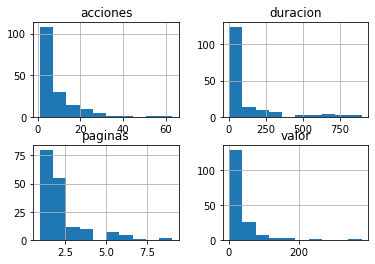

In [5]:
dataframe.drop(['clase'],1).hist()
plt.show()

Y también podemos interrelacionar las entradas de a pares, para ver como se concentran linealmente las salidas de usuarios por colores: Sistema Operativo Windows en azul, Macintosh en naranja y Linux en verde.

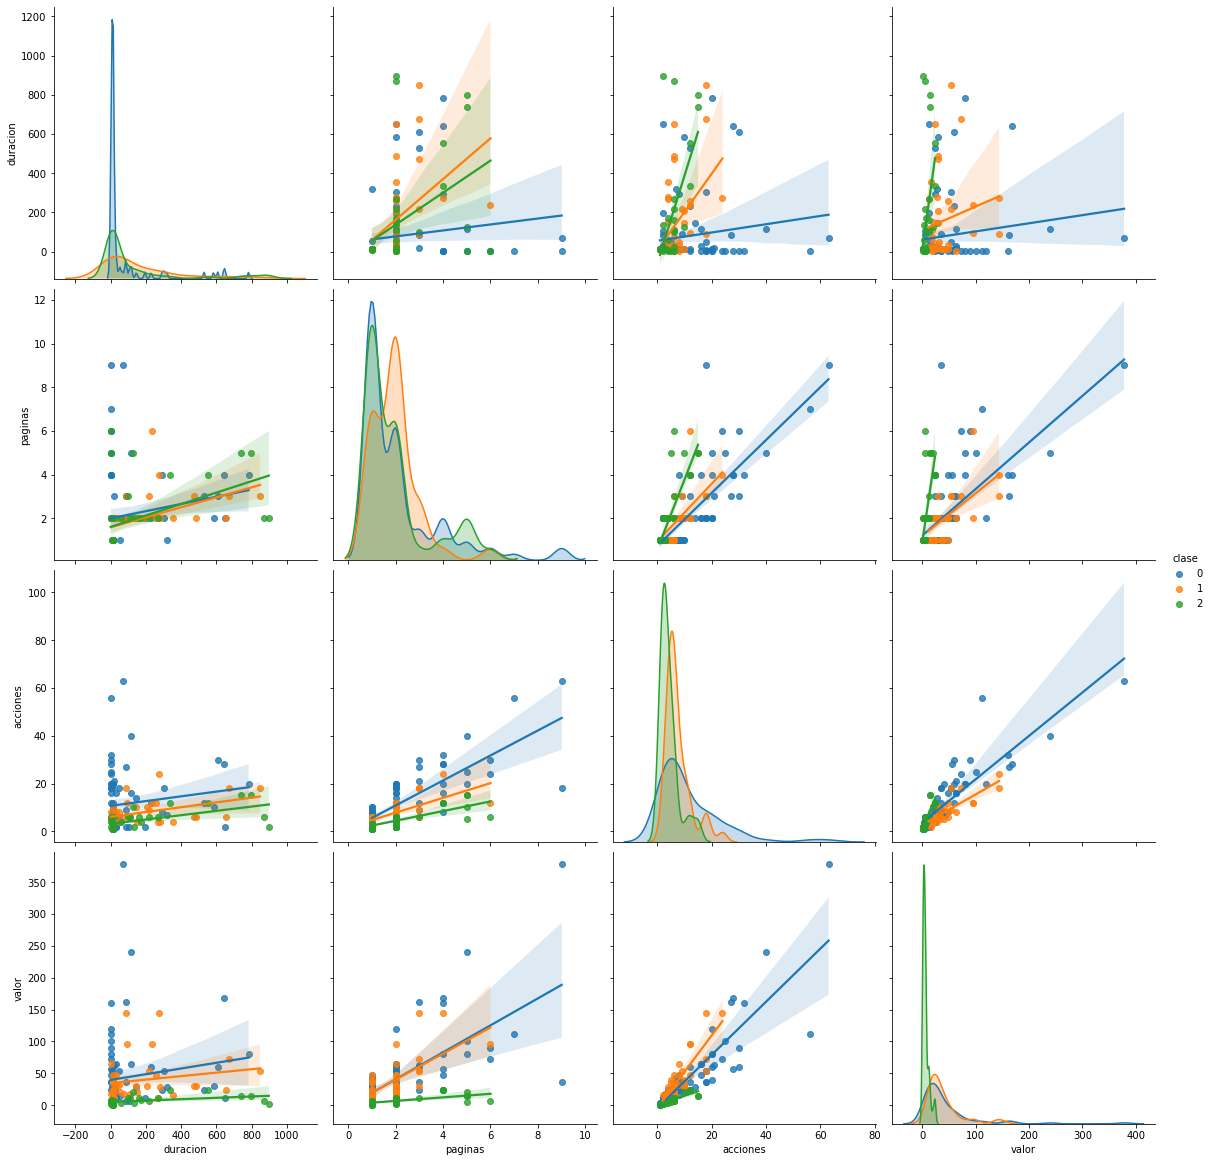

In [6]:
sb.pairplot(dataframe.dropna(), hue='clase',height=4,vars=["duracion", "paginas","acciones","valor"],kind='reg')

## Creamos el modelo de Regresión Logística
Ahora cargamos las variables de las 4 columnas de entrada en X excluyendo la columna “clase” con el método drop(). En cambio agregamos la columna “clase” en la variable y. Ejecutamos X.shape para comprobar la dimensión de nuestra matriz con datos de entrada de 170 registros por 4 columnas.

In [7]:
X = np.array(dataframe.drop(['clase'],1))
y = np.array(dataframe['clase'])
X.shape

(170, 4)

Y creamos nuestro modelo y hacemos que se ajuste (fit) a nuestro conjunto de entradas X y salidas ‘y’.

In [8]:
model = linear_model.LogisticRegression()
model.fit(X,y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Una vez compilado nuestro modelo, le hacemos clasificar todo nuestro conjunto de entradas X utilizando el método “predict(X)” y revisamos algunas de sus salidas y vemos que coincide con las salidas reales de nuestro archivo csv (columna clase)

In [9]:
predictions = model.predict(X)
print(predictions[0:5]) # Comprobamos los 5 primeros

[2 2 2 2 2]


Y confirmamos cuan bueno fue nuestro modelo utilizando model.score() que nos devuelve la precisión media de las predicciones, en nuestro caso del 78%.

In [10]:
model.score(X,y)

0.7823529411764706

# Adicional: Validación del Modelo
Una buena práctica en Machine Learning es la de subdividir nuestro conjunto de datos de entrada en un set de entrenamiento y otro para validar el modelo (que no se utiliza durante el entrenamiento y por lo tanto la máquina desconoce). Esto evitará problemas en los que nuestro algoritmo pueda fallar por “sobregeneralizar” el conocimiento.

Para ello, subdividimos nuestros datos de entrada en forma aleatoria (mezclados) utilizando 80% de registros para entrenamiento y 20% para validar.

In [11]:
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, y, test_size=validation_size, random_state=seed)

Volvemos a compilar nuestro modelo de Regresión Logística pero esta vez sólo con 80% de los datos de entrada y calculamos el nuevo scoring que ahora nos da 72%.

In [12]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=10, random_state=seed)
cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
print(msg)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the numbe

Logistic Regression: 0.728571 (0.094186)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Y ahora hacemos las predicciones -en realidad clasificación- utilizando nuestro “cross validation set”, es decir del subconjunto que habíamos apartado. En este caso vemos que los aciertos fueron del 85% pero hay que tener en cuenta que el tamaño de datos era pequeño.

In [13]:
predictions = model.predict(X_validation)
print(accuracy_score(Y_validation, predictions))

0.8529411764705882


## Reporte de Resultados
Finalmente vemos en pantalla la “matriz de confusión” donde muestra cuantos resultados equivocados tuvo de cada clase (los que no están en la diagonal), por ejemplo predijo 3 usuarios que eran Mac como usuarios de Windows y predijo a 2 usuarios Linux que realmente eran de Windows.

Recordatorio:
* "Clase 0" -> Windows
* "Clase 1" -> Mac
* "Clase 2" -> Linux

In [14]:
matriz_confusion = confusion_matrix(Y_validation, predictions)
print(matriz_confusion)

[[16  0  2]
 [ 3  3  0]
 [ 0  0 10]]


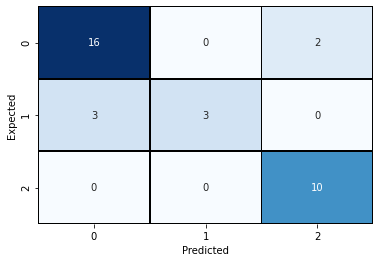

In [15]:
sb.heatmap(matriz_confusion, annot=True, cbar=False, linecolor='black',linewidths=0.7, cmap=plt.cm.Blues,fmt='g' )
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

__Output de classification_report()__
classification_report() te da un output con dos decimales como máximo, si quieres ampliarlo a más puedes hacer esto.

<code>classification_report(y_test, preds, digits=4) #ampliamos a 4 decimales</code>

__Cálculo de "precisión"__
\begin{equation*}
\frac{True Positive}{True Positive + False Positive}
\end{equation*}

El reporte de clasificación con nuestro conjunto de Validación. En nuestro caso vemos que se utilizaron como “soporte” 18 registros windows, 6 de mac y 10 de Linux (total de 34 registros). Podemos ver la precisión con que se acertaron cada una de las clases y vemos que por ejemplo de Macintosh tuvo 3 aciertos y 3 fallos (0.5 recall). La valoración que aqui nos conviene tener en cuenta es la de F1-score, que tiene en cuenta la precisión y recall. El promedio de F1 es de 85% lo cual no está nada mal (fila accuracy, columna f1-score).

In [16]:
report = classification_report(Y_validation, predictions)
print(report)

              precision    recall  f1-score   support

           0       0.84      0.89      0.86        18
           1       1.00      0.50      0.67         6
           2       0.83      1.00      0.91        10

    accuracy                           0.85        34
   macro avg       0.89      0.80      0.81        34
weighted avg       0.87      0.85      0.84        34



# Clasificación (o predicción) de nuevos registros
Como último ejercicio, vamos a inventar los datos de entrada de  navegación de un usuario ficticio que tiene estos valores:

* Tiempo Duración: 10
* Paginas visitadas: 3
* Acciones al navegar: 5
* Valoración: 9

Lo probamos en nuestro modelo y vemos que lo clasifica como un usuario tipo 2, es decir, de Linux.

In [17]:
X_new = pd.DataFrame({'duracion': [10], 'paginas': [3], 'acciones': [5], 'valor': [9]})
model.predict(X_new)

array([2], dtype=int64)